In [ ]:
# Install required packages (we'll use a different approach)
!pip install plotly

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Saving heart_cleaned2.csv to heart_cleaned2.csv
Uploaded files: ['heart_cleaned2.csv']
📁 Using file: heart_cleaned2.csv
Dataset Shape: (1025, 14)

First 5 rows:
   age     sex              cp  trestbps  chol     fbs  restecg  thalach  \
0   52    Male  Typical angina       125   212  Normal        1      168   
1   53    Male  Typical angina       140   203    High        0      155   
2   70    Male  Typical angina       145   174  Normal        1      125   
3   61    Male  Typical angina       148   203  Normal        1      161   
4   62  Female  Typical angina       138   294    High        1      106   

  exang  oldpeak        slope  ca          thal  target  
0    No      1.0    Upsloping   2        Normal       0  
1   Yes      3.1  Downsloping   0        Normal       0  
2   Yes      2.6  Downsloping   0        Normal       0  
3    No      0.0    Upsloping   1        Normal       0  
4    No      1.9         Flat   3  Fixed Defect       0  

Dataset Info:
<class 'pandas.core

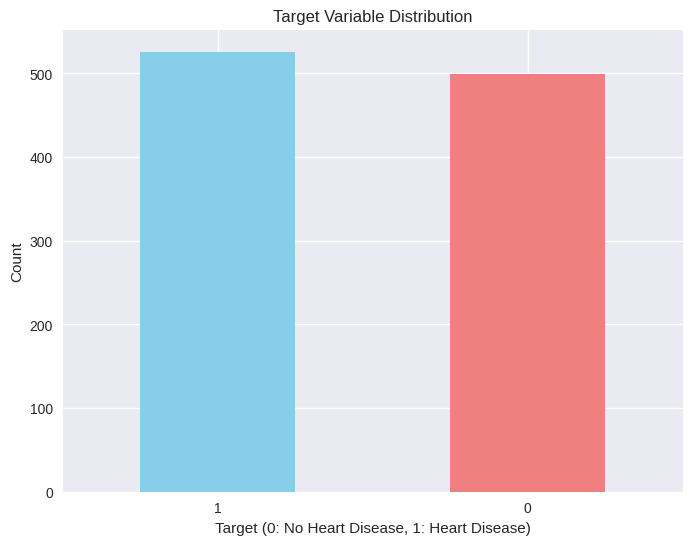

In [ ]:
# Upload file with auto-detection
from google.colab import files
uploaded = files.upload()

# Auto-detect CSV file name
print("Uploaded files:", list(uploaded.keys()))

# Find the first CSV file
csv_files = [f for f in uploaded.keys() if f.lower().endswith('.csv')]
if not csv_files:
    raise ValueError("❌ No CSV file found in uploaded files!")

filename = csv_files[0]
print(f"📁 Using file: {filename}")

# Load your dataset
import io
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print(df['target'].value_counts())

# Visualize target distribution
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Target Variable Distribution')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
sex unique values: ['Female' 'Male']
cp unique values: ['Asymptomatic' 'Atypical angina' 'Non-anginal pain' 'Typical angina']
fbs unique values: ['High' 'Normal']
restecg unique values: [0 1 2]
exang unique values: ['No' 'Yes']
slope unique values: ['Downsloping' 'Flat' 'Upsloping']
thal unique values: ['Fixed Defect' 'Normal' 'Reversible Defect']

Data after encoding:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   3       125   212    1        1      168      0      1.0      2   
1   53    1   3       140   203    0        0      155      1      3.1      0   
2   70    1   3       145   174    1        1      125      1      2.6      0   
3   61    1   3       148   203    1        1      161      0   

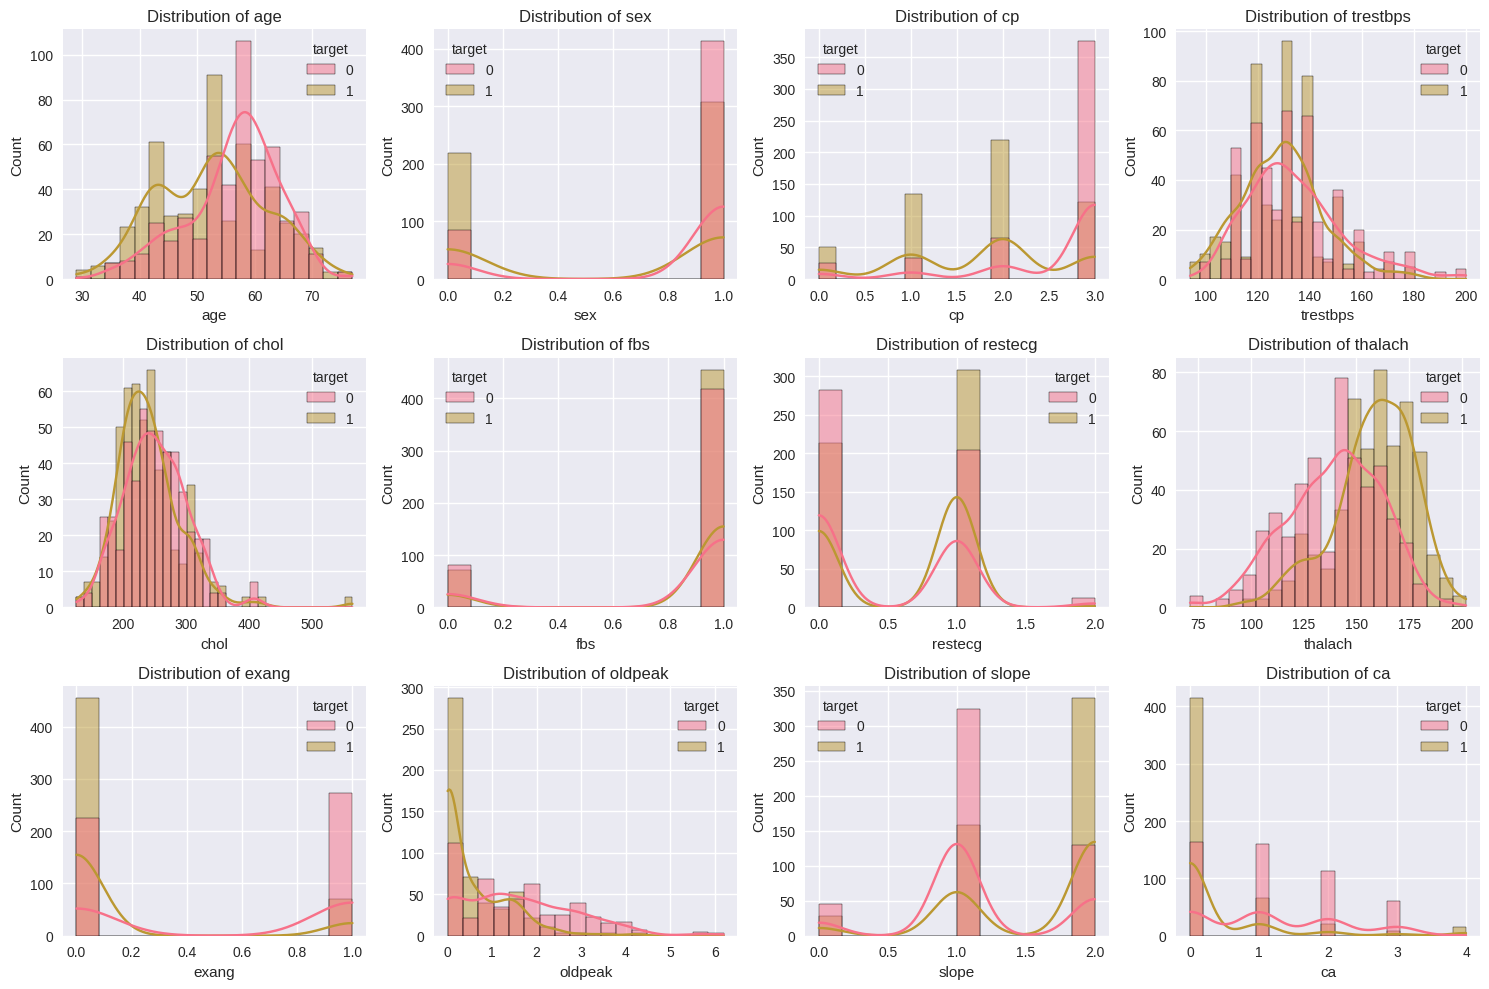

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

# Check for missing values
print("Missing values in each column:")
print(df_processed.isnull().sum())

# Handle categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col} unique values: {le.classes_}")

print("\nData after encoding:")
print(df_processed.head())

# Separate features and target
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Visualize feature distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:12], 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=X, x=column, hue=y, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target distribution in training set: {np.bincount(y_train)}")
print(f"Target distribution in test set: {np.bincount(y_test)}")

# Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

# Convert back to DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nScaled training data statistics:")
print(X_train_scaled_df.describe().round(2))

Training set size: (820, 13)
Test set size: (205, 13)
Target distribution in training set: [399 421]
Target distribution in test set: [100 105]
Feature scaling completed!

Scaled training data statistics:
          age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  820.00  820.00  820.00    820.00  820.00  820.00   820.00   820.00   
mean     0.00    0.00    0.00      0.00    0.00    0.00    -0.00    -0.00   
std      1.00    1.00    1.00      1.00    1.00    1.00     1.00     1.00   
min     -2.83   -1.54   -2.24     -2.15   -2.38   -2.35    -0.98    -3.50   
25%     -0.73   -1.54   -0.17     -0.69   -0.70    0.43    -0.98    -0.69   
50%      0.16    0.65   -0.17     -0.13   -0.13    0.43     0.93     0.11   
75%      0.71    0.65    0.87      0.43    0.60    0.43     0.93     0.69   
max      2.48    0.65    0.87      3.81    6.17    0.43     2.84     2.34   

        exang  oldpeak  slope      ca    thal  
count  820.00   820.00  820.0  820.00  820.00  
mean 

In [ ]:
# Variety 1: Basic KNN
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train_scaled, y_train)
y_pred_basic = knn_basic.predict(X_test_scaled)
y_pred_proba_basic = knn_basic.predict_proba(X_test_scaled)

print("Variety 1 - Basic KNN (Default Parameters)")
print(f"Number of neighbors: {knn_basic.n_neighbors}")
print(f"Weights: {knn_basic.weights}")
print(f"Algorithm: {knn_basic.algorithm}")
print(f"Metric: {knn_basic.metric}")

Variety 1 - Basic KNN (Default Parameters)
Number of neighbors: 5
Weights: uniform
Algorithm: auto
Metric: minkowski


In [ ]:
# Variety 2: KNN with different parameters
knn_variety2 = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='manhattan'
)
knn_variety2.fit(X_train_scaled, y_train)
y_pred_variety2 = knn_variety2.predict(X_test_scaled)
y_pred_proba_variety2 = knn_variety2.predict_proba(X_test_scaled)

print("Variety 2 - KNN with Custom Parameters")
print(f"Number of neighbors: {knn_variety2.n_neighbors}")
print(f"Weights: {knn_variety2.weights}")
print(f"Metric: {knn_variety2.metric}")

Variety 2 - KNN with Custom Parameters
Number of neighbors: 5
Weights: distance
Metric: manhattan


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Variety 3 - Optimized KNN (GridSearchCV)
Best parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best cross-validation score: 0.9829


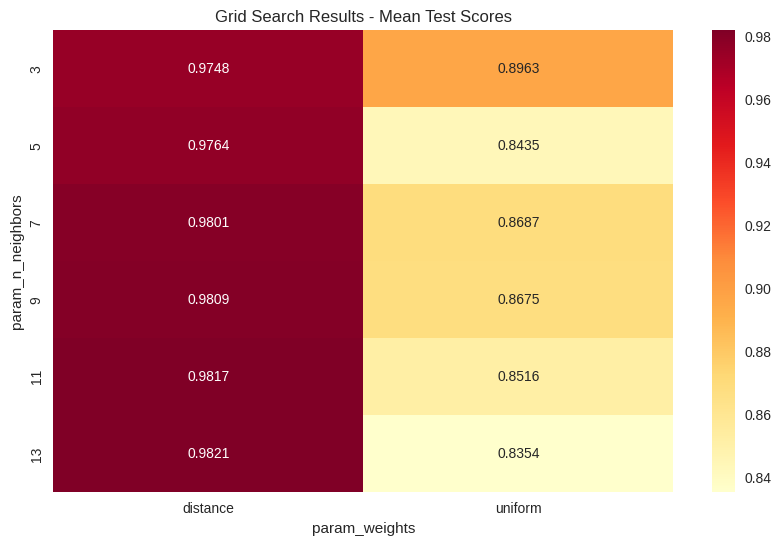

In [ ]:
# Variety 3: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
knn_optimized = grid_search.best_estimator_
y_pred_optimized = knn_optimized.predict(X_test_scaled)
y_pred_proba_optimized = knn_optimized.predict_proba(X_test_scaled)

print("Variety 3 - Optimized KNN (GridSearchCV)")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Plot grid search results
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(values='mean_test_score',
                                   index='param_n_neighbors',
                                   columns='param_weights')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlOrRd')
plt.title('Grid Search Results - Mean Test Scores')
plt.show()

In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Comprehensive evaluation function"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred_proba[:, 1])

    # Cross-validation scores
    if model_name == "Basic KNN":
        model_for_cv = knn_basic
    elif model_name == "KNN Custom":
        model_for_cv = knn_variety2
    else:
        model_for_cv = knn_optimized

    cv_scores = cross_val_score(model_for_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"5-Fold CV Accuracy: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")

    # Classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred))

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc,
        'CV_Score': cv_mean
    }

# Evaluate all varieties
results = []

print("="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)

# Variety 1
results.append(evaluate_model(y_test, y_pred_basic, y_pred_proba_basic, "Basic KNN"))

# Variety 2
results.append(evaluate_model(y_test, y_pred_variety2, y_pred_proba_variety2, "KNN Custom"))

# Variety 3
results.append(evaluate_model(y_test, y_pred_optimized, y_pred_proba_optimized, "KNN Optimized"))

MODEL EVALUATION RESULTS

Basic KNN Evaluation:
Accuracy: 0.8488
Precision: 0.8558
Recall: 0.8476
F1-Score: 0.8517
AUC-ROC: 0.9553
5-Fold CV Accuracy: 0.8390 (+/- 0.0333)

Classification Report for Basic KNN:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.86      0.85      0.85       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205


KNN Custom Evaluation:
Accuracy: 0.9951
Precision: 1.0000
Recall: 0.9905
F1-Score: 0.9952
AUC-ROC: 1.0000
5-Fold CV Accuracy: 0.9805 (+/- 0.0272)

Classification Report for KNN Custom:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weight


Comparison of All Varieties:
           Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC  CV_Score
0      Basic KNN    0.8488     0.8558  0.8476    0.8517   0.9553    0.8390
1     KNN Custom    0.9951     1.0000  0.9905    0.9952   1.0000    0.9805
2  KNN Optimized    0.9951     1.0000  0.9905    0.9952   1.0000    0.9829


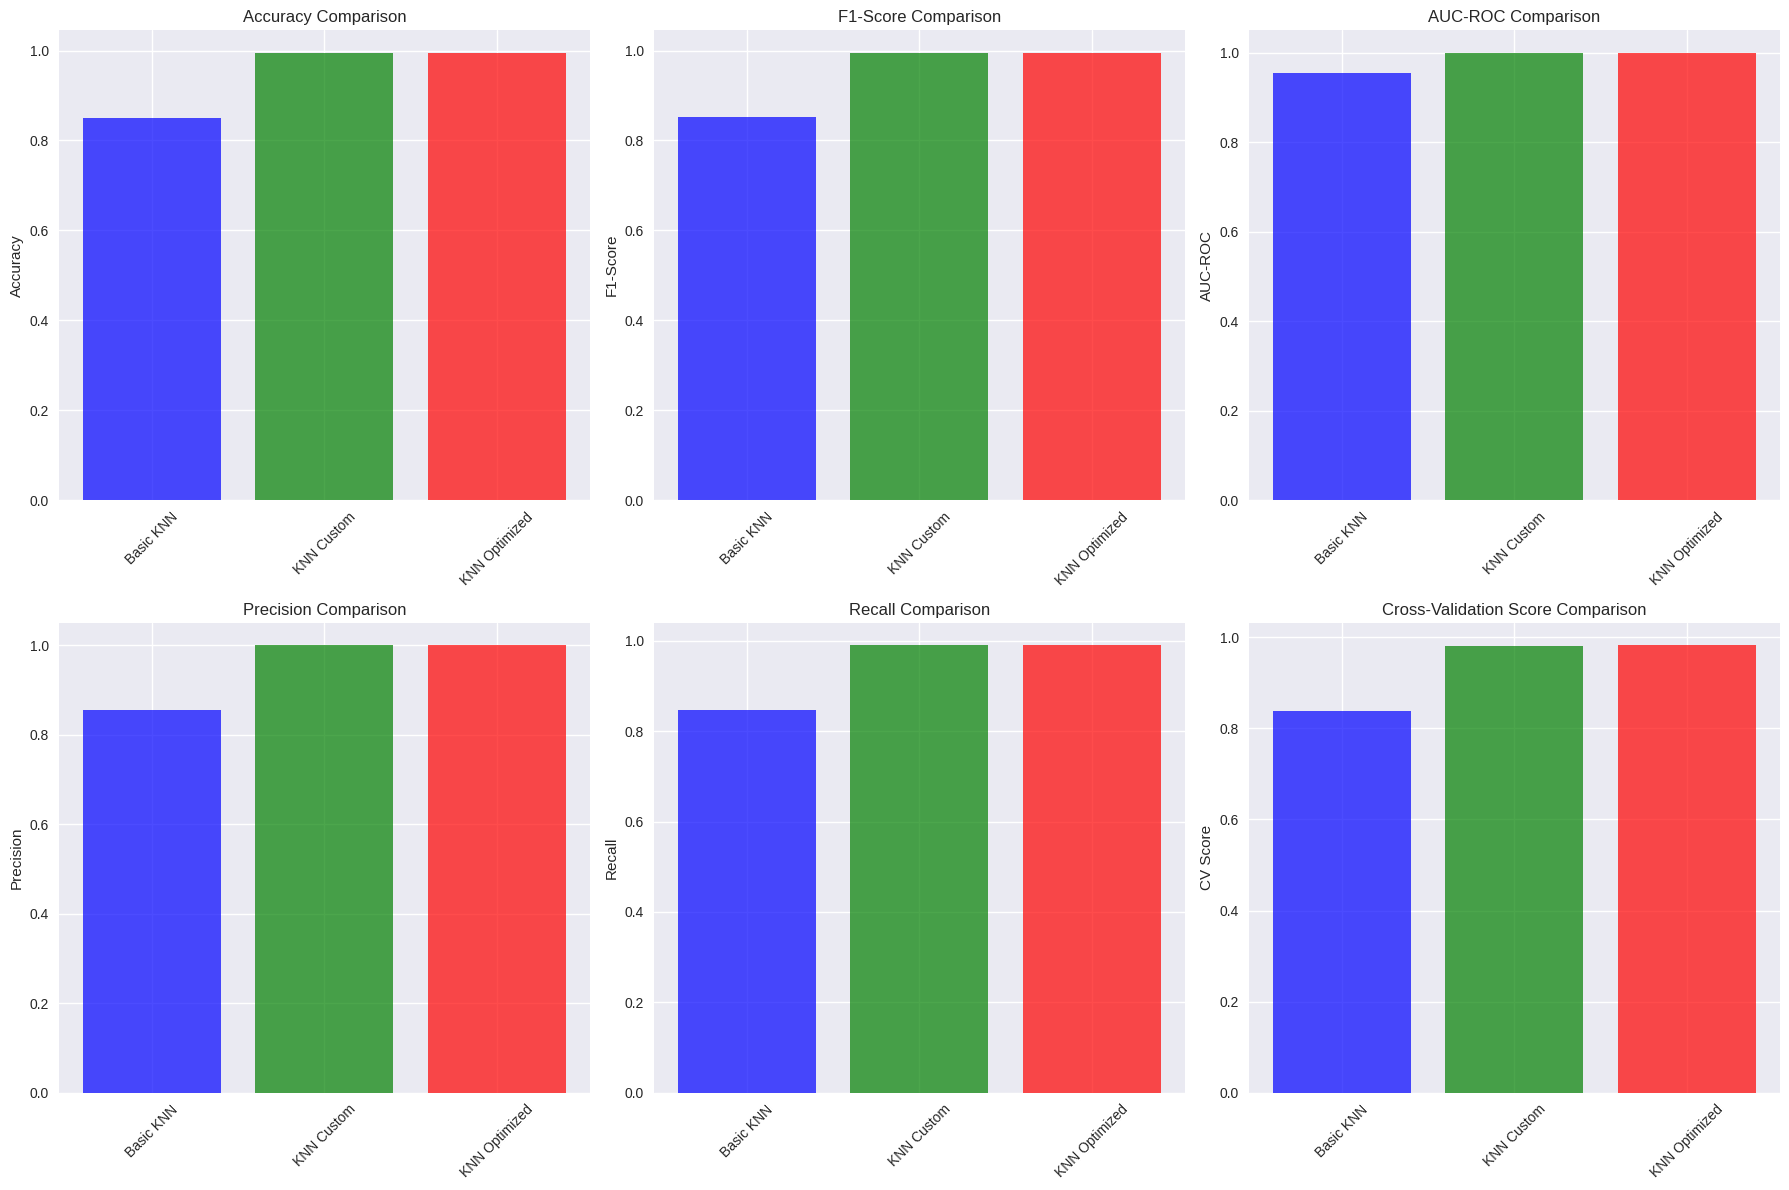

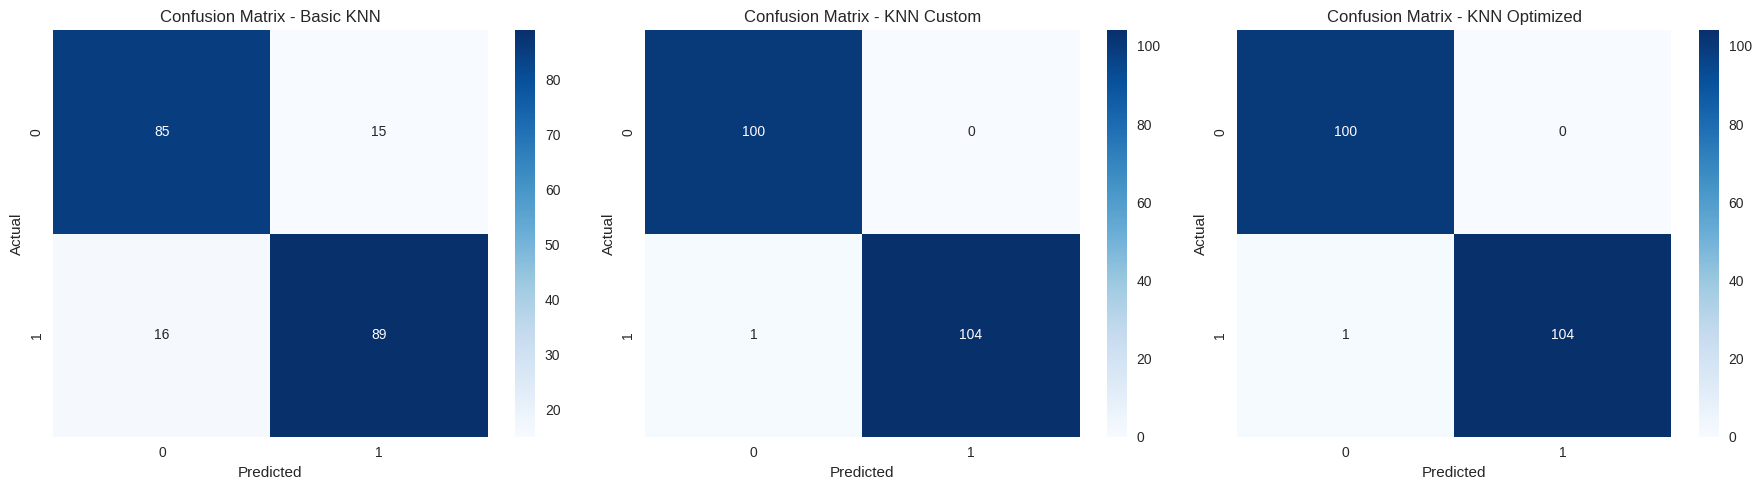

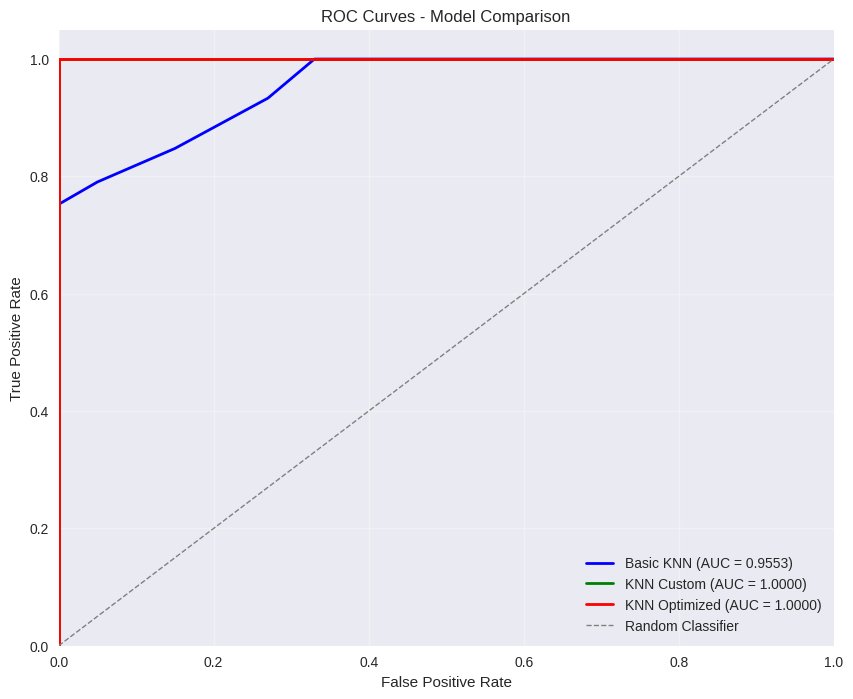

In [ ]:
# Create results dataframe
results_df = pd.DataFrame(results)
print("\nComparison of All Varieties:")
print(results_df.round(4))

# Plot comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Accuracy comparison
axes[0,0].bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'red'], alpha=0.7)
axes[0,0].set_title('Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0,1].bar(results_df['Model'], results_df['F1-Score'], color=['blue', 'green', 'red'], alpha=0.7)
axes[0,1].set_title('F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# AUC-ROC comparison
axes[0,2].bar(results_df['Model'], results_df['AUC-ROC'], color=['blue', 'green', 'red'], alpha=0.7)
axes[0,2].set_title('AUC-ROC Comparison')
axes[0,2].set_ylabel('AUC-ROC')
axes[0,2].tick_params(axis='x', rotation=45)

# Precision comparison
axes[1,0].bar(results_df['Model'], results_df['Precision'], color=['blue', 'green', 'red'], alpha=0.7)
axes[1,0].set_title('Precision Comparison')
axes[1,0].set_ylabel('Precision')
axes[1,0].tick_params(axis='x', rotation=45)

# Recall comparison
axes[1,1].bar(results_df['Model'], results_df['Recall'], color=['blue', 'green', 'red'], alpha=0.7)
axes[1,1].set_title('Recall Comparison')
axes[1,1].set_ylabel('Recall')
axes[1,1].tick_params(axis='x', rotation=45)

# Cross-validation comparison
axes[1,2].bar(results_df['Model'], results_df['CV_Score'], color=['blue', 'green', 'red'], alpha=0.7)
axes[1,2].set_title('Cross-Validation Score Comparison')
axes[1,2].set_ylabel('CV Score')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Confusion Matrix for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_info = [
    (y_pred_basic, "Basic KNN"),
    (y_pred_variety2, "KNN Custom"),
    (y_pred_optimized, "KNN Optimized")
]

for idx, (y_pred, name) in enumerate(models_info):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {name}')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# ROC Curves for all models (Fixed - using sklearn directly)
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for y_pred_proba, name, color in [
    (y_pred_proba_basic, "Basic KNN", 'blue'),
    (y_pred_proba_variety2, "KNN Custom", 'green'),
    (y_pred_proba_optimized, "KNN Optimized", 'red')
]:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {auc_score:.4f})')

# Plot random classifier
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Create detailed comparison table
comparison_data = []

for i, (pred, proba, name, model) in enumerate([
    (y_pred_basic, y_pred_proba_basic, "Basic KNN", knn_basic),
    (y_pred_variety2, y_pred_proba_variety2, "KNN Custom", knn_variety2),
    (y_pred_optimized, y_pred_proba_optimized, "KNN Optimized", knn_optimized)
]):

    comparison_data.append({
        'Model Variety': name,
        'n_neighbors': model.n_neighbors,
        'weights': model.weights,
        'metric': model.metric,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'AUC-ROC': roc_auc_score(y_test, proba[:, 1]),
        'Best Parameters': str(getattr(model, 'best_params_', 'Default'))
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nDetailed Model Varieties Comparison:")
print(comparison_df.round(4))

# Create a nice formatted table
styled_df = comparison_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'AUC-ROC': '{:.4f}'
}).background_gradient(cmap='YlOrBr', subset=['Accuracy', 'F1-Score', 'AUC-ROC'])

display(styled_df)


Detailed Model Varieties Comparison:
   Model Variety  n_neighbors   weights     metric  Accuracy  Precision  \
0      Basic KNN            5   uniform  minkowski    0.8488     0.8558   
1     KNN Custom            5  distance  manhattan    0.9951     1.0000   
2  KNN Optimized           13  distance  manhattan    0.9951     1.0000   

   Recall  F1-Score  AUC-ROC Best Parameters  
0  0.8476    0.8517   0.9553         Default  
1  0.9905    0.9952   1.0000         Default  
2  0.9905    0.9952   1.0000         Default  


In [ ]:
# Step 1: Install required packages
!pip install ipywidgets

# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Step 3: Load and prepare the model (using your existing code)
from google.colab import files
uploaded = files.upload()

# Auto-detect CSV file
print("Uploaded files:", list(uploaded.keys()))

# Find the first CSV file
csv_files = [f for f in uploaded.keys() if f.lower().endswith('.csv')]
if not csv_files:
    raise ValueError("❌ No CSV file found in uploaded files!")

filename = csv_files[0]
print(f"📁 Using file: {filename}")

import io
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Preprocessing
df_processed = df.copy()
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

X = df_processed.drop('target', axis=1)
y = df_processed['target']

# Train the model (using the best parameters from your previous work)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN model with optimal parameters
knn_model = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')
knn_model.fit(X_scaled, y)

print("✅ Model trained successfully!")
print(f"Model Accuracy: {knn_model.score(X_scaled, y):.2f}")

# Step 4: Create the UI
print("\n" + "="*50)
print("❤️ HEART DISEASE PREDICTION SYSTEM")
print("="*50)
print("Please enter the patient's information below:")

# Create input widgets
age = widgets.IntSlider(value=50, min=20, max=100, description='Age:')
sex = widgets.Dropdown(options=[('Male', 'Male'), ('Female', 'Female')], description='Sex:')
cp = widgets.Dropdown(
    options=[
        ('Typical Angina', 'Typical angina'),
        ('Atypical Angina', 'Atypical angina'),
        ('Non-anginal Pain', 'Non-anginal pain'),
        ('Asymptomatic', 'Asymptomatic')
    ],
    description='Chest Pain:'
)
trestbps = widgets.IntSlider(value=120, min=90, max=200, description='Resting BP:')
chol = widgets.IntSlider(value=200, min=100, max=600, description='Cholesterol:')
fbs = widgets.Dropdown(options=[('Normal', 'Normal'), ('High', 'High')], description='Fasting BS:')
restecg = widgets.Dropdown(
    options=[('Normal', 'Normal'), ('ST-T Abnormality', 'ST-T Abnormality'), ('LV Hypertrophy', 'LV Hypertrophy')],
    description='Resting ECG:'
)
thalach = widgets.IntSlider(value=150, min=60, max=220, description='Max Heart Rate:')
exang = widgets.Dropdown(options=[('No', 'No'), ('Yes', 'Yes')], description='Exercise Angina:')
oldpeak = widgets.FloatSlider(value=1.0, min=0.0, max=6.0, step=0.1, description='ST Depression:')
slope = widgets.Dropdown(
    options=[('Upsloping', 'Upsloping'), ('Flat', 'Flat'), ('Downsloping', 'Downsloping')],
    description='ST Slope:'
)
ca = widgets.IntSlider(value=0, min=0, max=4, description='Major Vessels:')
thal = widgets.Dropdown(
    options=[('Normal', 'Normal'), ('Fixed Defect', 'Fixed Defect'), ('Reversible Defect', 'Reversible Defect')],
    description='Thalassemia:'
)

# Create predict button
predict_button = widgets.Button(description="🔍 Predict Heart Disease", button_style='success')
clear_button = widgets.Button(description="🔄 Clear", button_style='warning')

# Create output area
output = widgets.Output()

# Step 5: Define the prediction function
def predict_heart_disease(b):
    with output:
        clear_output()

        try:
            # Get all values
            patient_data = {
                'age': age.value,
                'sex': sex.value,
                'cp': cp.value,
                'trestbps': trestbps.value,
                'chol': chol.value,
                'fbs': fbs.value,
                'restecg': restecg.value,
                'thalach': thalach.value,
                'exang': exang.value,
                'oldpeak': oldpeak.value,
                'slope': slope.value,
                'ca': ca.value,
                'thal': thal.value
            }

            print("📊 Patient Information:")
            print("-" * 30)
            for key, value in patient_data.items():
                print(f"{key.upper()}: {value}")
            print("-" * 30)

            # Convert to DataFrame
            input_df = pd.DataFrame([patient_data])

            # Encode categorical variables
            input_df_encoded = input_df.copy()
            for col in categorical_columns:
                le = label_encoders[col]
                # Handle unseen labels by using the most common class
                if input_df[col].iloc[0] in le.classes_:
                    input_df_encoded[col] = le.transform([input_df[col].iloc[0]])
                else:
                    input_df_encoded[col] = le.transform([le.classes_[0]])[0]

            # Scale the features
            input_scaled = scaler.transform(input_df_encoded)

            # Make prediction
            prediction = knn_model.predict(input_scaled)[0]
            probability = knn_model.predict_proba(input_scaled)[0]

            # Display results
            print("\n🎯 PREDICTION RESULTS:")
            print("=" * 40)
            if prediction == 1:
                print("❌ RESULT: HEART DISEASE DETECTED")
                print(f"🔬 Confidence: {probability[1]*100:.1f}%")
                print("\n💡 Recommendation:")
                print("• Consult a cardiologist immediately")
                print("• Maintain a healthy lifestyle")
                print("• Regular exercise and balanced diet")
            else:
                print("✅ RESULT: NO HEART DISEASE")
                print(f"🔬 Confidence: {probability[0]*100:.1f}%")
                print("\n💡 Recommendation:")
                print("• Continue healthy habits")
                print("• Regular health checkups")
                print("• Maintain balanced diet")

            # Show probability breakdown
            print("\n📈 Probability Breakdown:")
            print(f"   No Heart Disease: {probability[0]*100:.1f}%")
            print(f"   Heart Disease:    {probability[1]*100:.1f}%")

        except Exception as e:
            print(f"❌ Error: {str(e)}")
            print("Please check your inputs and try again.")

def clear_inputs(b):
    with output:
        clear_output()
    age.value = 50
    sex.value = 'Male'
    cp.value = 'Typical angina'
    trestbps.value = 120
    chol.value = 200
    fbs.value = 'Normal'
    restecg.value = 'Normal'
    thalach.value = 150
    exang.value = 'No'
    oldpeak.value = 1.0
    slope.value = 'Upsloping'
    ca.value = 0
    thal.value = 'Normal'

# Connect buttons to functions
predict_button.on_click(predict_heart_disease)
clear_button.on_click(clear_inputs)

# Step 6: Display the UI
print("\n📝 Patient Information Form:")

# Create a grid layout
left_panel = widgets.VBox([age, sex, cp, trestbps, chol, fbs])
right_panel = widgets.VBox([restecg, thalach, exang, oldpeak, slope, ca, thal])
form = widgets.HBox([left_panel, right_panel])

# Display everything
display(form)
display(widgets.HBox([predict_button, clear_button]))
display(output)

# Step 7: Add some instructions
print("\n" + "="*50)
print("📋 INSTRUCTIONS:")
print("• Adjust the sliders and dropdowns for patient information")
print("• Click 'Predict Heart Disease' to get results")
print("• Click 'Clear' to reset all values")
print("="*50)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:00


Saving heart_cleaned.csv to heart_cleaned.csv
Uploaded files: ['heart_cleaned.csv']
📁 Using file: heart_cleaned.csv
✅ Model trained successfully!
Model Accuracy: 0.91

❤️ HEART DISEASE PREDICTION SYSTEM
Please enter the patient's information below:

📝 Patient Information Form:


Output()


📋 INSTRUCTIONS:
• Adjust the sliders and dropdowns for patient information
• Click 'Predict Heart Disease' to get results
• Click 'Clear' to reset all values
